# How to classify MNIST digits with a simple neural network architecture?

In [31]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils  import to_categorical
from tensorflow.keras.layers import Dense # Dense layers are "fully connected" layers
from tensorflow.keras.models import Sequential # Documentation: https://keras.io/models/sequential/
import matplotlib.pyplot as plt


Load the MNIST data (or downlaod it if not already done) 

In [32]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Prepare and convert the data

In [34]:
np.set_printoptions(linewidth=150)   # Enlarge the line the see all the element in one column
print(x_train[42])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1  26 111 195 230  30   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  28 107 195 254 254 254 244  20   

In [35]:
print(y_train[42])

7


In [36]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28
# Flatten the images
image_vector_size = 28*28   # = 784 
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


In [37]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape)

Training data shape:  (60000, 784)
Test data shape (10000, 784)


In [38]:
print("Training label shape: ", y_train.shape) # (60000,) -- 60000 numbers (all 0-9)
print("First 5 training labels: ", y_train[:10]) # [5, 0, 4, 1, 9]

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("First 5 training lables as one-hot encoded vectors:\n", y_train[:10])

Training label shape:  (60000,)
First 5 training labels:  [5 0 4 1 9 2 1 3 1 4]
First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [39]:
print(y_train[42])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [40]:
model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=64, activation='sigmoid', input_shape=(image_vector_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

Compile, train and evaluate the model

In [41]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5025 - loss: 1.6890 - val_accuracy: 0.8545 - val_loss: 0.7613
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8348 - loss: 0.7533 - val_accuracy: 0.8900 - val_loss: 0.5372
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8710 - loss: 0.5668 - val_accuracy: 0.9032 - val_loss: 0.4387
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8872 - loss: 0.4735 - val_accuracy: 0.9147 - val_loss: 0.3702
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8969 - loss: 0.4180 - val_accuracy: 0.9187 - val_loss: 0.3336
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.8903 - loss: 0.4178


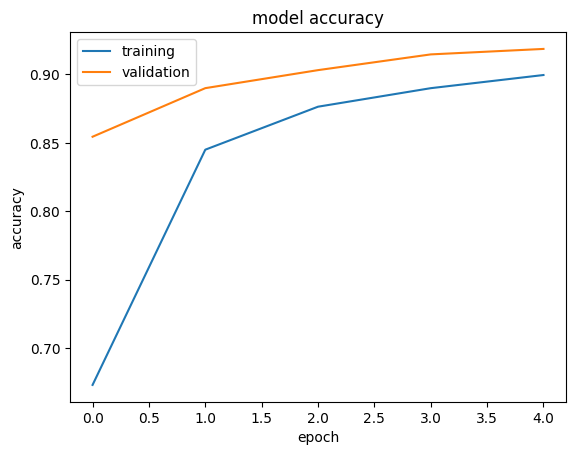

Test loss: 0.376
Test accuracy: 0.903


In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [44]:
print(  model.predict( np.array([x_train[42]]) ))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[7.4392091e-04 6.0906527e-03 2.7551576e-03 2.7230345e-03 6.5497863e-03 3.5428179e-03 1.1169234e-03 8.8038558e-01 2.6772944e-03 9.3414724e-02]]


In [45]:
print( np.round( model.predict( np.array([x_train[42]]) ), decimals=2) )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[0.   0.01 0.   0.   0.01 0.   0.   0.88 0.   0.09]]


In [46]:
print( np.round (model.predict( np.array([x_train[42]]) )))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [47]:
print( np.argmax( model.predict( np.array([x_train[42]]) )))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7
